In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
%cd /content/gdrive/MyDrive/XB00036

/content/gdrive/MyDrive/XB00036


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

movie_df = pd.read_csv('./data/ml-1m/movies.dat', names=['movie_id', 'title', 'genre'], delimiter='::')

user_df = pd.read_csv('./data/ml-1m/users.dat', names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::')

rating_df = pd.read_csv('./data/ml-1m/ratings.dat', names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::')

In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


## 전체 영화 개수 출력하기

In [ ]:
print('total number of movie in data:', len(movie_df['movie_id'].unique()))

total number of movie in data: 3883


In [ ]:
movie_df['year'] = movie_df['title'].apply(lambda x: x[-5:-1]) # -5, -4, -3, -2

In [ ]:
movie_df['title'] = movie_df['title'].apply(lambda x: x[:-7])

In [ ]:
movie_df.head()

,movie_id,title,genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


# 연도별 개봉작 수 출력 하기

In [ ]:
year_counts = movie_df['year'].value_counts()[:10]

for i, (year, count) in enumerate(year_counts.iteritems(), 1):
  print('Top', i, ':', year, '(', count, ')')

Top 1 : 1996 ( 345 )
Top 2 : 1995 ( 342 )
Top 3 : 1998 ( 337 )
Top 4 : 1997 ( 315 )
Top 5 : 1999 ( 283 )
Top 6 : 1994 ( 257 )
Top 7 : 1993 ( 165 )
Top 8 : 2000 ( 156 )
Top 9 : 1986 ( 104 )
Top 10 : 1992 ( 102 )


# 연대별 개봉작 수 시각화하기

In [ ]:
movie_df['years'] = movie_df['year'].apply(lambda x : x[:3] + '0')    # [:-1] + '0', x[2] + '0\'s'

In [ ]:
movie_df.head()

,movie_id,title,genre,year,years
0,1,Toy Story,Animation|Children's|Comedy,1995,1990
1,2,Jumanji,Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men,Comedy|Romance,1995,1990
3,4,Waiting to Exhale,Comedy|Drama,1995,1990
4,5,Father of the Bride Part II,Comedy,1995,1990


In [ ]:
movie_df.tail(10)

,movie_id,title,genre,year,years
3873,3943,Bamboozled,Comedy,2000,2000
3874,3944,Bootmen,Comedy|Drama,2000,2000
3875,3945,Digimon: The Movie,Adventure|Animation|Children's,2000,2000
3876,3946,Get Carter,Action|Drama|Thriller,2000,2000
3877,3947,Get Carter,Thriller,1971,1970
3878,3948,Meet the Parents,Comedy,2000,2000
3879,3949,Requiem for a Dream,Drama,2000,2000
3880,3950,Tigerland,Drama,2000,2000
3881,3951,Two Family House,Drama,2000,2000
3882,3952,"Contender, The",Drama|Thriller,2000,2000


In [ ]:
years_counts_data = movie_df['years'].value_counts().sort_index()

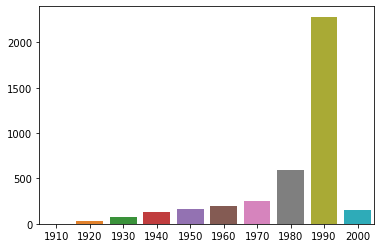

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(years_counts_data.index, years_counts_data.values)
plt.show()

# 영화 장르 분석하기

In [ ]:
"dog,cat,baby".split(',')

['dog', 'cat', 'baby']

In [ ]:
'Adventure|Animation|Children'.split('|')

['Adventure', 'Animation', 'Children']

In [ ]:
genre_counts_dict = {}

for index, row in movie_df.iterrows():
  parsed_genre = row['genre'].split('|')
  for genre in parsed_genre:
    if genre in genre_counts_dict:
      genre_counts_dict[genre] += 1
    else:
      genre_counts_dict[genre] = 1

genre_counts_dict

{'Action': 503,
 'Adventure': 283,
 'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Crime': 211,
 'Documentary': 127,
 'Drama': 1603,
 'Fantasy': 68,
 'Film-Noir': 44,
 'Horror': 343,
 'Musical': 114,
 'Mystery': 106,
 'Romance': 471,
 'Sci-Fi': 276,
 'Thriller': 492,
 'War': 143,
 'Western': 68}

# 영화 장르 분석결과 시각화

In [ ]:
genre_counts_dict.keys()

dict_keys(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'])

In [ ]:
genre_counts_dict.values()

dict_values([105, 251, 1200, 283, 68, 471, 1603, 503, 211, 492, 343, 276, 127, 143, 114, 106, 44, 68])

[]

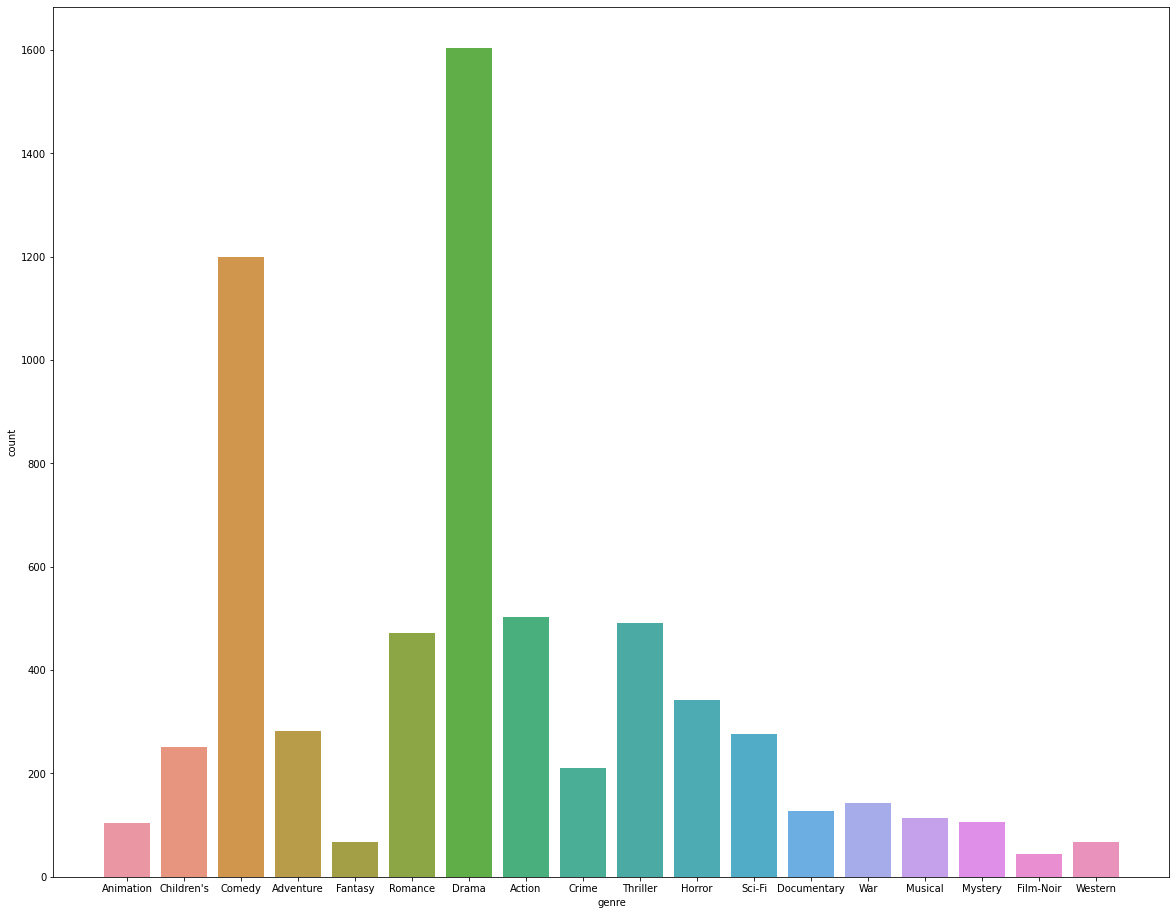

In [ ]:
plt.rcParams['figure.figsize'] = (20, 16)
sns.barplot(list(genre_counts_dict.keys()), list(genre_counts_dict.values()))
plt.xlabel('genre')
plt.ylabel('count')
plt.plot()

# 전체 사용자 수 탐색

In [ ]:
len(user_df['user_id'].unique())

6040

In [ ]:
user_df.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
user_df['user_id'].nunique()

6040

# 전체 사용자의 성별 탐색

In [ ]:
gender_count = user_df['gender'].value_counts()

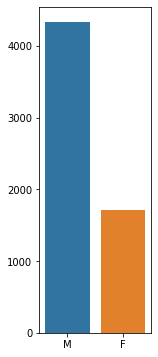

In [ ]:
plt.figure(figsize=(2,6))    # 기본 사이즈 (8,6)
#plt.bar(gender_count.index, gender_count.values)
sns.barplot(gender_count.index, gender_count.values)
plt.show()

# 전체 사용자의 연령대 탐색

In [ ]:
user_df['age_group'] = user_df['age'].apply(lambda x : x//10 * 10)

ages_count = user_df['age_group'].value_counts(sort=False)
ages_count = ages_count.sort_index()
ages_count.rename(index={0:'outlier'}, inplace=True)

In [ ]:
ages_count

outlier     222
10         1103
20         2096
30         1193
40          550
50          876
Name: age_group, dtype: int64

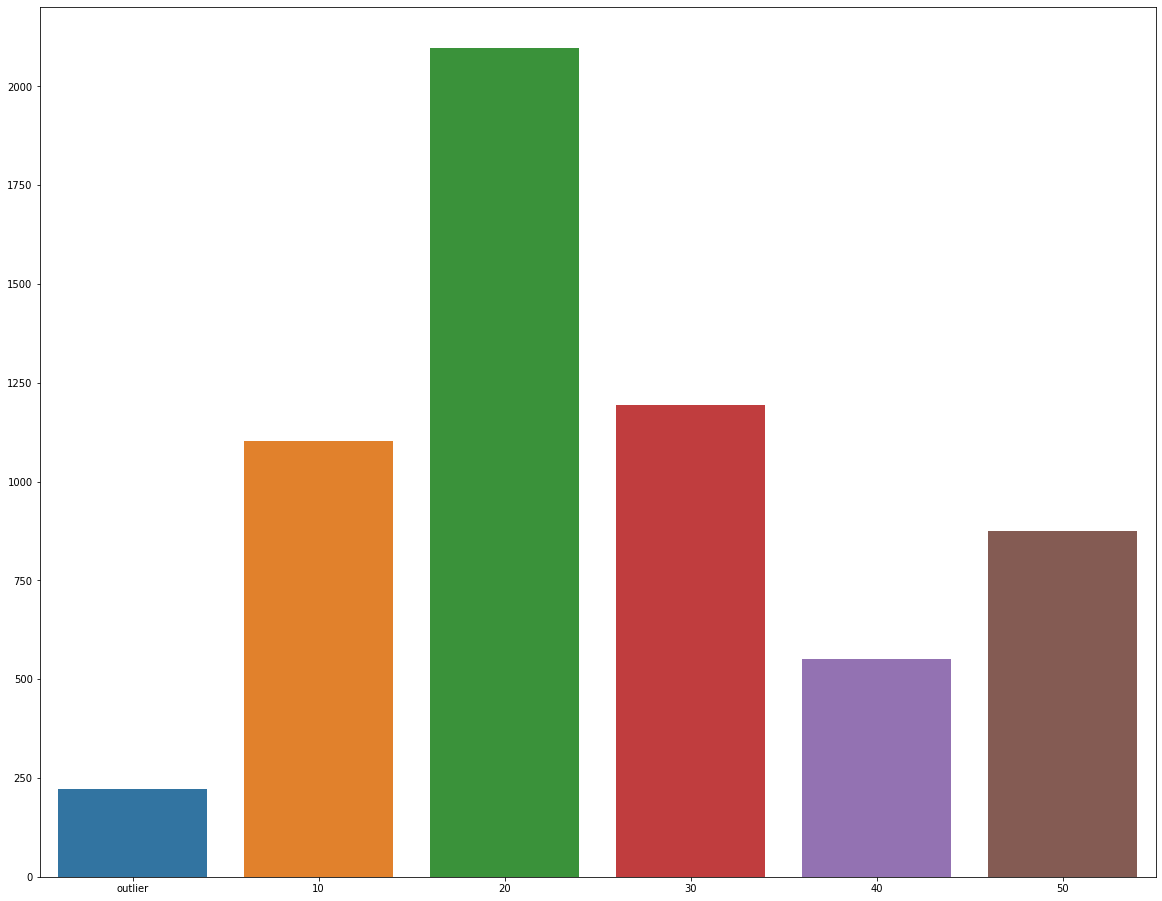

In [ ]:
sns.barplot(ages_count.index, ages_count.values)
plt.show()

# 영화 별 평점 수 (평가받은 횟수) 탐색

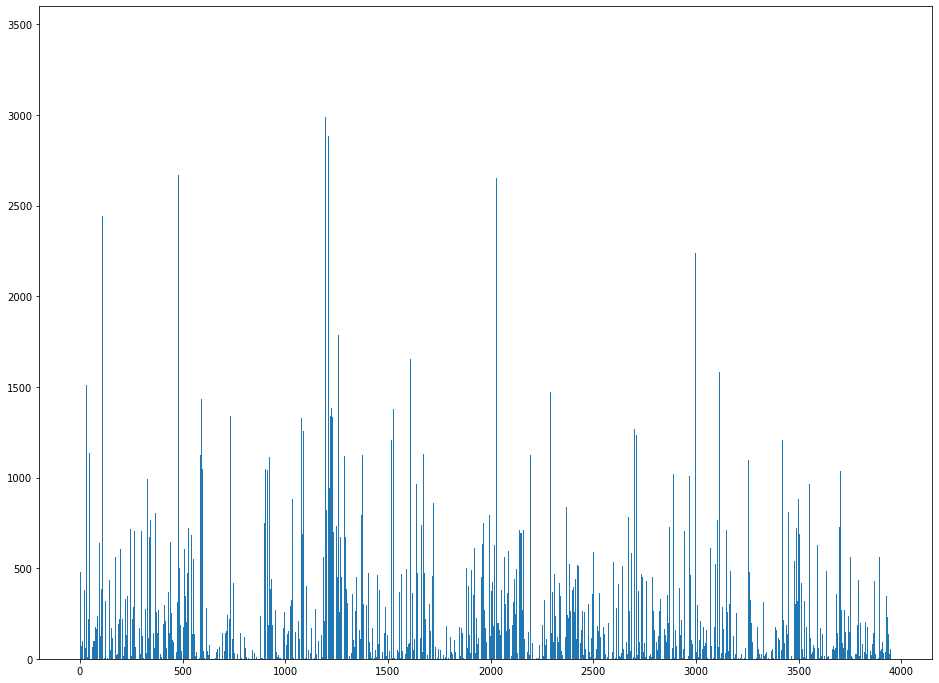

In [ ]:
movie_rating_count = rating_df.groupby('movie_id')['rating'].count()

plt.figure(figsize=(16,12))
plt.bar(movie_rating_count.index, movie_rating_count.values)
plt.show()

In [ ]:
movie_rating_count.idxmax()

2858

In [ ]:
movie_rating_count.max()

3428

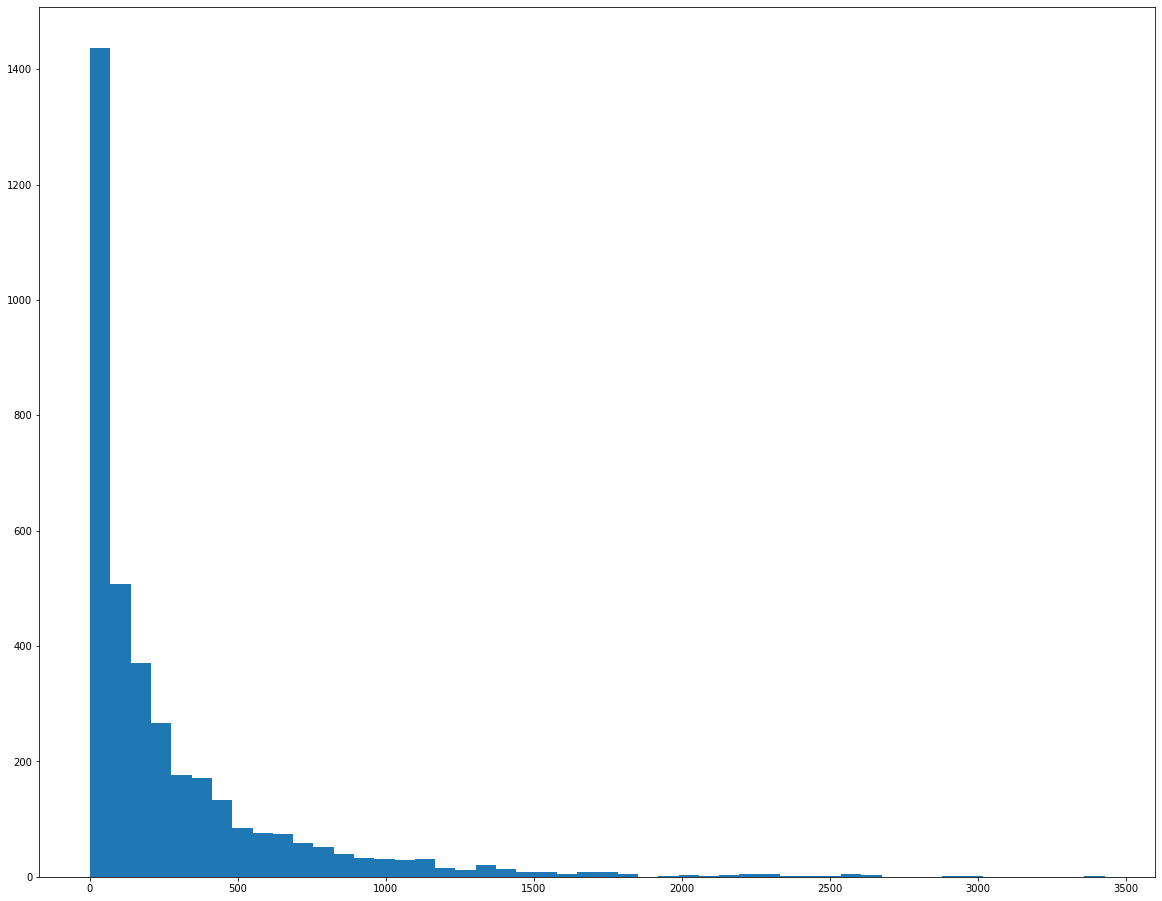

In [ ]:
plt.hist(movie_rating_count.values, bins=50)
plt.show()

In [ ]:
movie_df['movie_id'].nunique()

3883

In [ ]:
movie_rating_count[movie_rating_count < 100].size

1687

In [ ]:
len(movie_rating_count[movie_rating_count < 100])

1687

# 영화 별 평균 평점 탐색

In [ ]:
movie_rating_mean = rating_df.groupby('movie_id')['rating'].mean()
movie_rating_mean.head(20)

movie_id
1     4.146846
2     3.201141
3     3.016736
4     2.729412
5     3.006757
6     3.878723
7     3.410480
8     3.014706
9     2.656863
10    3.540541
11    3.793804
12    2.362500
13    3.262626
14    3.542484
15    2.458904
16    3.793255
17    4.027545
18    3.337580
19    2.480720
20    2.537500
Name: rating, dtype: float64

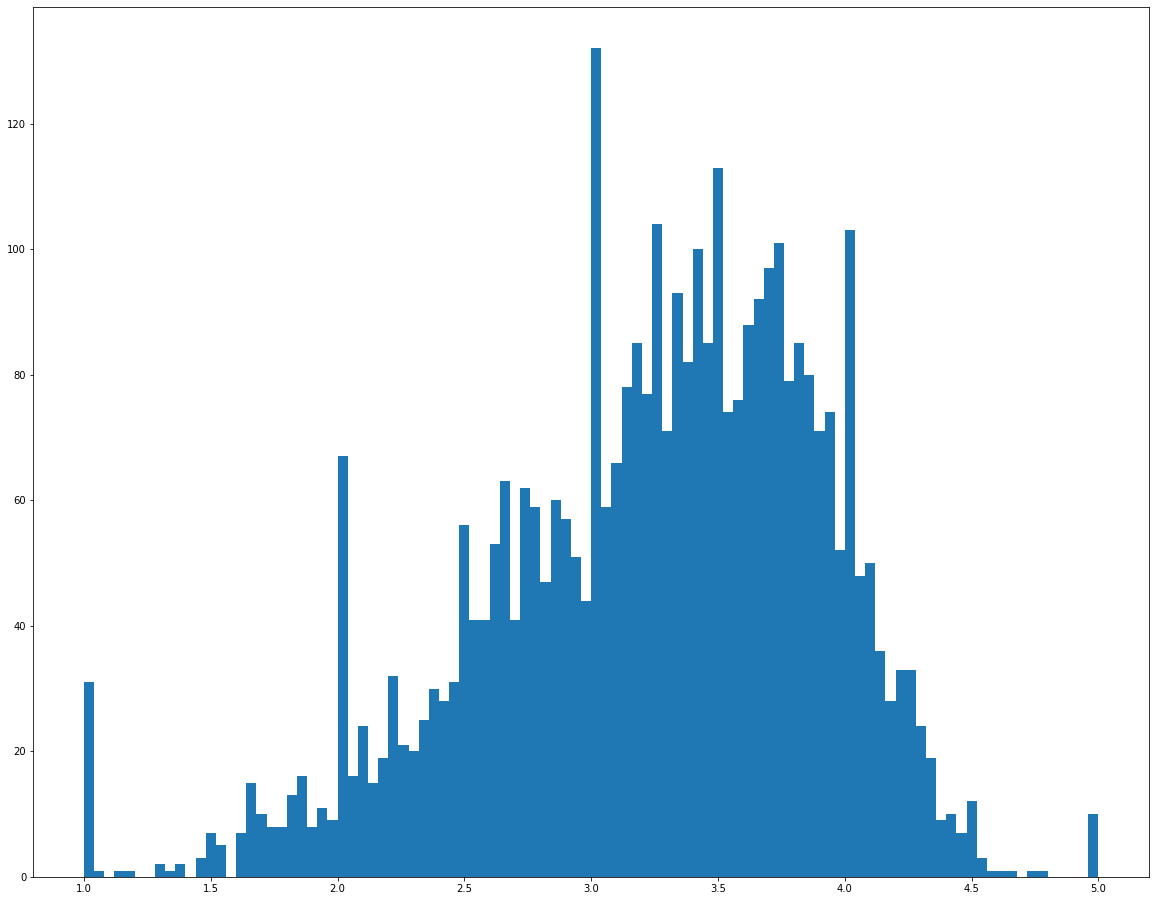

In [ ]:
plt.hist(movie_rating_mean.values, bins=100)
plt.show()

In [ ]:
rating_df.describe()

,user_id,movie_id,rating,time
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [ ]:
movie_rating_info = rating_df.groupby('movie_id')['rating'].agg(['count', 'mean', 'std'])
movie_rating_info.head()

,count,mean,std
movie_id,,,
1,2077,4.146846,0.852349
2,701,3.201141,0.983172
3,478,3.016736,1.071712
4,170,2.729412,1.013381
5,296,3.006757,1.025086


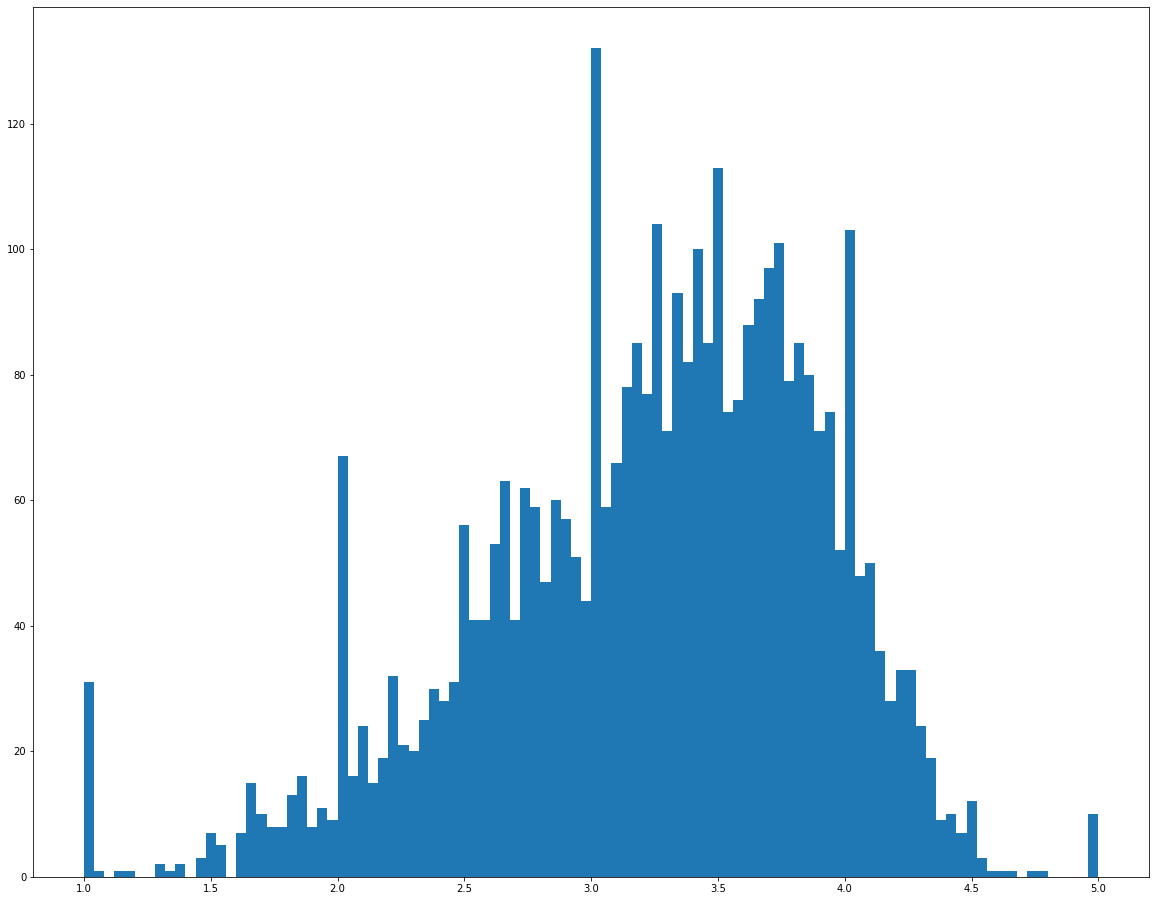

In [ ]:
plt.hist(movie_rating_info['mean'], bins=100)
plt.show()

In [ ]:
movie_rating_info.rename(columns = lambda x: 'rating_' + x, inplace = True)

In [ ]:
movie_rating_info.head()

,rating_count,rating_mean,rating_std
movie_id,,,
1,2077,4.146846,0.852349
2,701,3.201141,0.983172
3,478,3.016736,1.071712
4,170,2.729412,1.013381
5,296,3.006757,1.025086


# 사용자 별 평가한 영화 개수 탐색

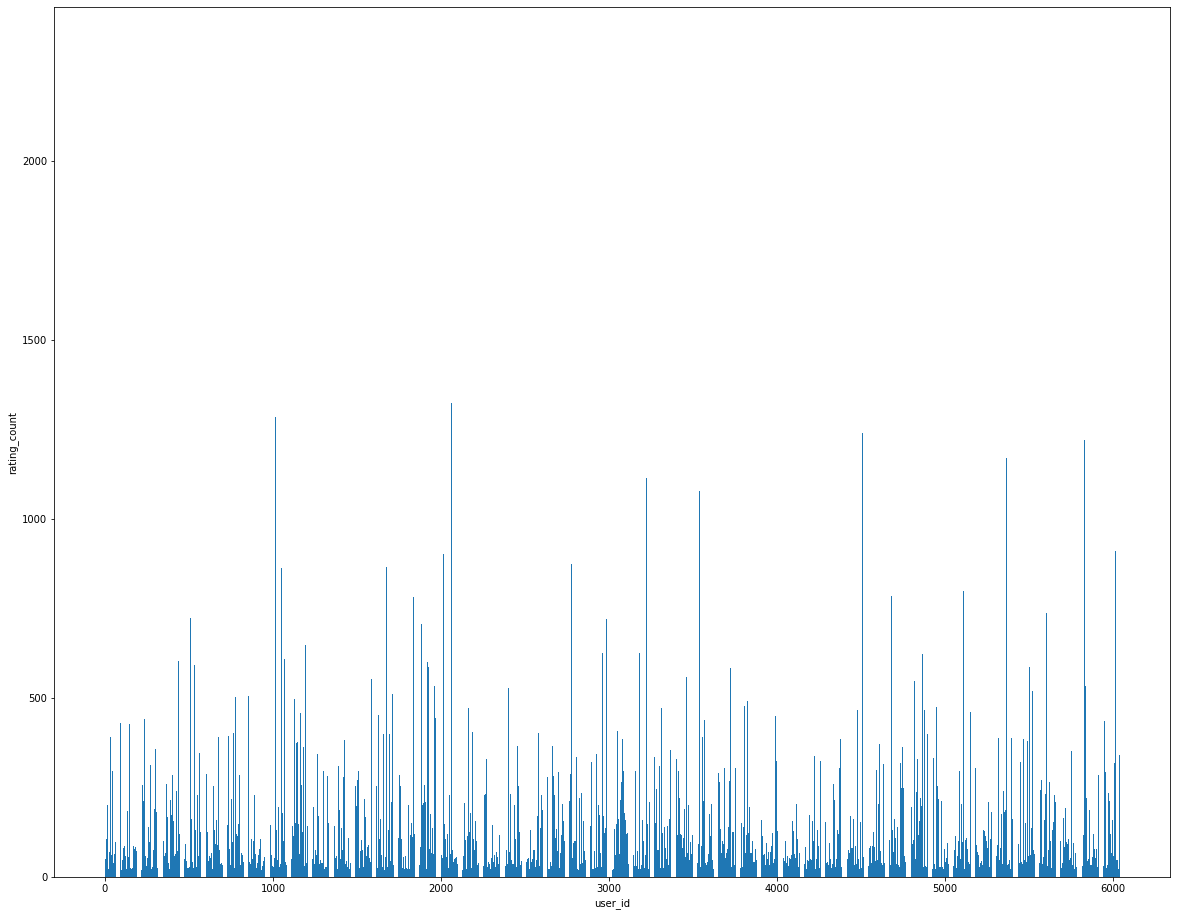

In [ ]:
user_rating_count = rating_df.groupby('user_id')['rating'].count()

plt.bar(user_rating_count.index, user_rating_count.values)
plt.xlabel('user_id')
plt.ylabel('rating_count')
plt.show()

In [ ]:
user_rating_count.sort_values(ascending=False)

user_id
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5258      20
341       20
2530      20
4068      20
947       20
Name: rating, Length: 6040, dtype: int64

In [ ]:
user_df[user_df['user_id']==4169]

,user_id,gender,age,occupation,zipcode,age_group
4168,4169,M,50,0,66048,50


In [ ]:
top_user_id = user_rating_count.idxmax()
user_df[user_df['user_id']==top_user_id]

,user_id,gender,age,occupation,zipcode,age_group
4168,4169,M,50,0,66048,50


In [ ]:
movie_df[movie_df['movie_id'] == 2858]

,movie_id,title,genre,year,years
2789,2858,American Beauty,Comedy|Drama,1999,1990


In [ ]:
movie_rating_info['rating_mean'].max()

5.0

In [ ]:
movie_df[movie_df['movie_id'] == 787]

,movie_id,title,genre,year,years
777,787,"Gate of Heavenly Peace, The",Documentary,1995,1990


In [ ]:
movie_rating_info.loc[787]

rating_count    3.0
rating_mean     5.0
rating_std      0.0
Name: 787, dtype: float64

# 사용자 별 평가한 영화 평점 분포(평균, 표준편차)탐색

In [ ]:
user_rating_info = rating_df.groupby('user_id')['rating'].agg(['mean', 'std'])
user_rating_info.rename(columns={'mean':'rating_mean', 'std':'rating_std'}, inplace=True)
user_rating_info.head()

,rating_mean,rating_std
user_id,,
1,4.188679,0.680967
2,3.713178,1.001513
3,3.901961,0.984985
4,4.190476,1.077917
5,3.146465,1.132699


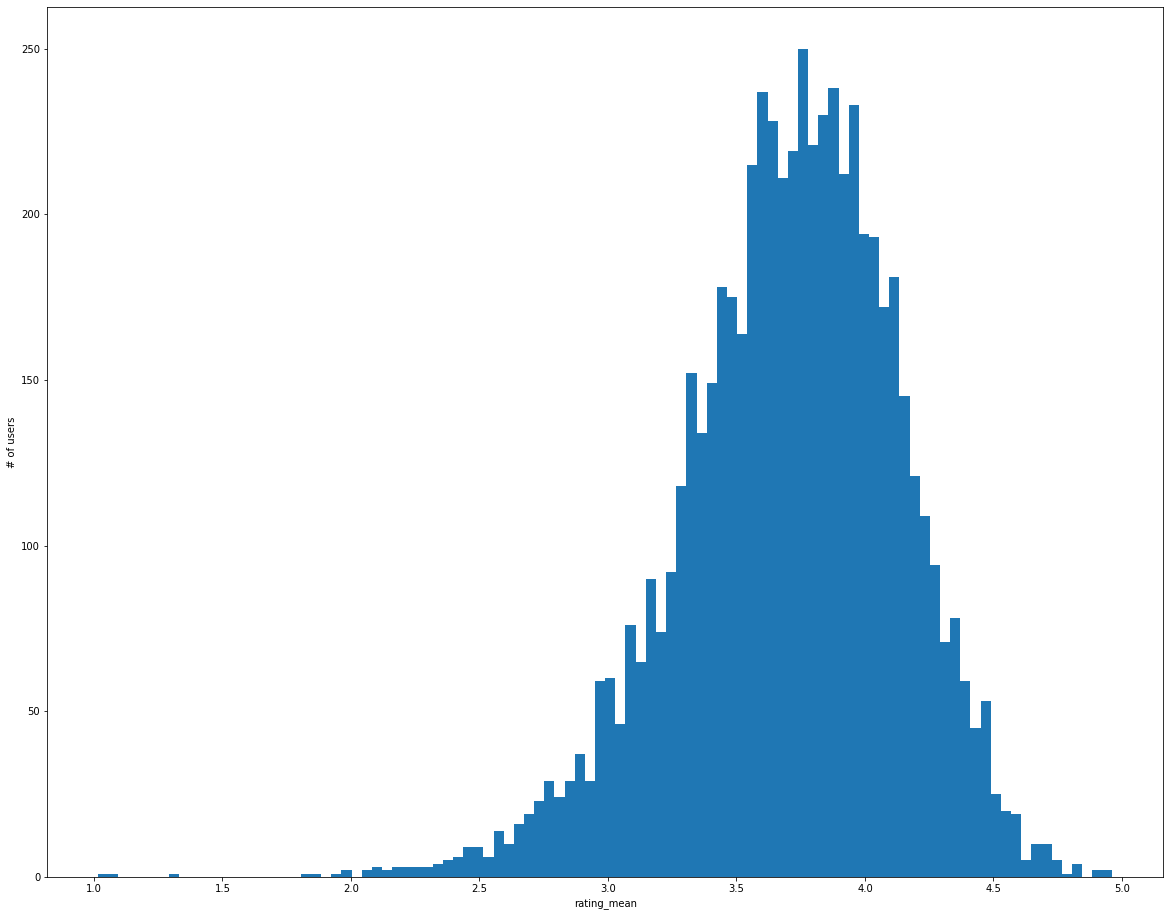

In [ ]:
plt.hist(user_rating_info['rating_mean'].values, bins=100)
plt.xlabel('rating_mean')
plt.ylabel('# of users')
plt.show()

In [ ]:
rating_df.describe()

,user_id,movie_id,rating,time
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [ ]:
user_rating_info

,rating_mean,rating_std
user_id,,
1,4.188679,0.680967
2,3.713178,1.001513
3,3.901961,0.984985
4,4.190476,1.077917
5,3.146465,1.132699
...,...,...
6036,3.302928,1.023684
6037,3.717822,0.877910
6038,3.800000,1.105013


# 사용자와 영화 간 평점 행렬 생성

In [ ]:
rating_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
rating_df[['user_id', 'movie_id', 'rating']].head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [ ]:
rating_df[['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id']).head(10)

rating
user_id movie_id        
1       1193           5
        661            3
        914            3
        3408           4
        2355           5
        1197           3
        1287           5
        2804           5
        594            4
        919            4

In [ ]:
um_rating_df = rating_df[['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id'])
um_rating_df.head()

rating
user_id movie_id        
1       1193           5
        661            3
        914            3
        3408           4
        2355           5

In [ ]:
um_rating_df.unstack(-1)

rating                           ...                              
movie_id   1    2    3    4    5    6     ... 3947 3948 3949 3950 3951 3952
user_id                                   ...                              
1           5.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2           NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
3           NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
4           NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
5           NaN  NaN  NaN  NaN  NaN  2.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
6036        NaN  NaN  NaN  2.0  NaN  3.0  ...  NaN  NaN  NaN  NaN  NaN  NaN
6037        NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
6038        NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
6039        NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
6040        3.0  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN

[6040 rows x 3706 columns]

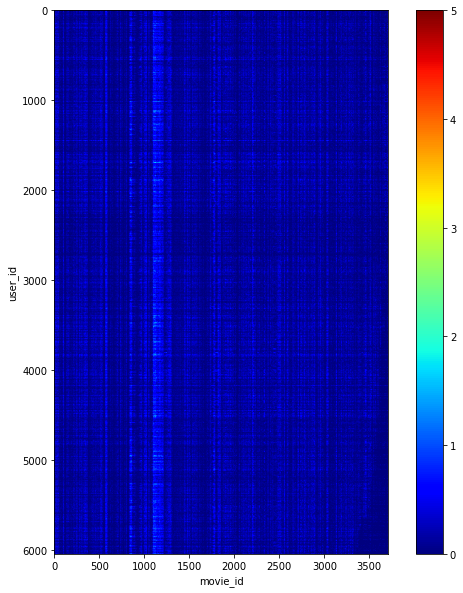

In [ ]:
rating_table = um_rating_df.unstack(fill_value=0)

plt.figure(figsize=(10,10))
plt.imshow(rating_table, cmap='jet')    # show image
plt.colorbar()
plt.xlabel('movie_id')
plt.ylabel('user_id')
plt.show()

In [ ]:
!pip install surprise

In [ ]:
from surprise import Reader, Dataset

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_df[['user_id', 'movie_id', 'rating']], reader)

# 훈련 데이터셋과 테스트 데이터셋 분할

In [ ]:
from surprise.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_data

In [ ]:
type(test_data)

list

# SVD 모델 훈련

In [ ]:
from surprise import SVD

model = SVD(random_state=42)
model.fit(train_data)

# 영화를 추천할 사용자의 기존 평점 데이터 추출

In [ ]:
test_user_id = 4
test_user_rating_df = rating_df[rating_df['user_id'] == test_user_id]    # 불리언 인덱싱
test_user_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 233 to 253
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   21 non-null     int64
 1   movie_id  21 non-null     int64
 2   rating    21 non-null     int64
 3   time      21 non-null     int64
dtypes: int64(4)
memory usage: 840.0 bytes


In [ ]:
test_user_rating_df.head()

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [ ]:
test_user_rating_dict = {}

for _, row in test_user_rating_df.iterrows():
  movie_id = row['movie_id']
  rating = row['rating']
  test_user_rating_dict[movie_id] = rating

test_user_rating_dict

{260: 5,
 480: 4,
 1036: 4,
 1097: 4,
 1196: 2,
 1198: 5,
 1201: 5,
 1210: 3,
 1214: 4,
 1240: 5,
 1387: 5,
 1954: 5,
 2028: 5,
 2366: 4,
 2692: 5,
 2947: 5,
 2951: 4,
 3418: 4,
 3468: 5,
 3527: 1,
 3702: 4}

# 특정 사용자가 평가하지 않은 영화 목록 생성

In [ ]:
test_user_unrated_movies = []

for _, row in movie_df.iterrows():
  movie_id = row['movie_id']
  rating = 0
  if movie_id in test_user_rating_dict:
    continue
  test_user_unrated_movies.append((test_user_id, movie_id, rating))

test_user_unrated_movies[:10]

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0)]

# 영화 평점 예측 및 정렬

In [ ]:
test_user_predictions = model.test(test_user_unrated_movies)
len(test_user_predictions)

3862

In [ ]:
test_user_predicted_rating_dict = {}

for _, movie_id, _, predicted_rating, _ in test_user_predictions:
  test_user_predicted_rating_dict[movie_id] = predicted_rating

In [ ]:
test_user_predicted_rating_dict

{1: 4.09688727743794,
 2: 3.41172972814524,
 3: 3.1930007683493895,
 4: 3.001780649468635,
 5: 3.108423452883594,
 6: 3.829756740451222,
 7: 3.206699420353713,
 8: 3.4965446175420065,
 9: 2.8686514963120393,
 10: 3.7390566356672372,
 11: 3.837128633294278,
 12: 2.731942402735499,
 13: 3.515919231501918,
 14: 3.8334068929712872,
 15: 2.878362389743806,
 16: 3.981371258848737,
 17: 4.1749083360295485,
 18: 3.574470005295118,
 19: 2.59161864232805,
 20: 2.6870334712373656,
 21: 3.8109394166452115,
 22: 3.5621442793529865,
 23: 3.132651988790237,
 24: 3.263648956804694,
 25: 3.7326398704426658,
 26: 3.912583324830253,
 27: 3.328199613279863,
 28: 4.299193723685695,
 29: 3.794917875469919,
 30: 4.002020628880339,
 31: 3.1660178646535466,
 32: 4.058061875776347,
 33: 3.4883584147484985,
 34: 3.8611123309676705,
 35: 3.5414734560063152,
 36: 4.1940043809530225,
 37: 3.865861157681738,
 38: 3.102095561077352,
 39: 3.719263558623275,
 40: 3.905340028537711,
 41: 3.9045812969098406,
 42: 3.11798

In [ ]:
import operator

test_user_predicted_rating = sorted(test_user_predicted_rating_dict.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
movie_df.head()

,movie_id,title,genre,year,years
0,1,Toy Story,Animation|Children's|Comedy,1995,1990
1,2,Jumanji,Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men,Comedy|Romance,1995,1990
3,4,Waiting to Exhale,Comedy|Drama,1995,1990
4,5,Father of the Bride Part II,Comedy,1995,1990


In [ ]:
movie_dict = {}

for _, row in movie_df.iterrows():
  movie_id = row['movie_id']
  movie_dict[movie_id] = row['title']

movie_dict

{1: 'Toy Story',
 2: 'Jumanji',
 3: 'Grumpier Old Men',
 4: 'Waiting to Exhale',
 5: 'Father of the Bride Part II',
 6: 'Heat',
 7: 'Sabrina',
 8: 'Tom and Huck',
 9: 'Sudden Death',
 10: 'GoldenEye',
 11: 'American President, The',
 12: 'Dracula: Dead and Loving It',
 13: 'Balto',
 14: 'Nixon',
 15: 'Cutthroat Island',
 16: 'Casino',
 17: 'Sense and Sensibility',
 18: 'Four Rooms',
 19: 'Ace Ventura: When Nature Calls',
 20: 'Money Train',
 21: 'Get Shorty',
 22: 'Copycat',
 23: 'Assassins',
 24: 'Powder',
 25: 'Leaving Las Vegas',
 26: 'Othello',
 27: 'Now and Then',
 28: 'Persuasion',
 29: 'City of Lost Children, The',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao)',
 31: 'Dangerous Minds',
 32: 'Twelve Monkeys',
 33: 'Wings of Courage',
 34: 'Babe',
 35: 'Carrington',
 36: 'Dead Man Walking',
 37: 'Across the Sea of Time',
 38: 'It Takes Two',
 39: 'Clueless',
 40: 'Cry, the Beloved Country',
 41: 'Richard III',
 42: 'Dead Presidents',
 43: 'Restoration',
 44: 'Mortal Kombat',

In [ ]:
for pred in test_user_predicted_rating[:10]:
  movie_id = pred[0]
  predicted_rating = pred[1]
  print(f'{movie_dict[movie_id]} : {predicted_rating: .2f}')

Yojimbo :  4.75
Boat, The (Das Boot) :  4.72
Sanjuro :  4.69
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) :  4.61
Schindler's List :  4.58
Wrong Trousers, The :  4.57
Patton :  4.56
Godfather, The :  4.56
General, The :  4.55
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb :  4.55


# 예측 모델 평가하기

In [ ]:
test_data[:10]

[(1841, 3717, 1.0),
 (3715, 880, 3.0),
 (2002, 3072, 4.0),
 (3332, 2734, 3.0),
 (3576, 631, 3.0),
 (2092, 3247, 3.0),
 (5283, 2643, 1.0),
 (4610, 2124, 3.0),
 (398, 3176, 4.0),
 (4533, 357, 4.0)]

In [ ]:
test_result = model.test(test_data)
test_result[:10]

[Prediction(uid=1841, iid=3717, r_ui=1.0, est=2.2449976403111225, details={'was_impossible': False}),
 Prediction(uid=3715, iid=880, r_ui=3.0, est=2.3409641615799037, details={'was_impossible': False}),
 Prediction(uid=2002, iid=3072, r_ui=4.0, est=4.162753727349445, details={'was_impossible': False}),
 Prediction(uid=3332, iid=2734, r_ui=3.0, est=3.581362383138148, details={'was_impossible': False}),
 Prediction(uid=3576, iid=631, r_ui=3.0, est=2.364333134477365, details={'was_impossible': False}),
 Prediction(uid=2092, iid=3247, r_ui=3.0, est=2.7021717901846625, details={'was_impossible': False}),
 Prediction(uid=5283, iid=2643, r_ui=1.0, est=1.709113929542525, details={'was_impossible': False}),
 Prediction(uid=4610, iid=2124, r_ui=3.0, est=3.368837123993786, details={'was_impossible': False}),
 Prediction(uid=398, iid=3176, r_ui=4.0, est=3.692115092361899, details={'was_impossible': False}),
 Prediction(uid=4533, iid=357, r_ui=4.0, est=3.5262583411384347, details={'was_impossible':

In [ ]:
from surprise import accuracy

accuracy.rmse(test_result)

RMSE: 0.8729


0.8728931555711223

# 최적의 n_factors 찾기

In [ ]:
rmse_ = []

for n_factors in range(10, 101, 10):
  model = SVD(n_factors = n_factors, random_state=42)
  model.fit(train_data)
  rmse_.append(accuracy.rmse(model.test(test_data)))

RMSE: 0.8738
RMSE: 0.8731
RMSE: 0.8698
RMSE: 0.8714
RMSE: 0.8706
RMSE: 0.8715
RMSE: 0.8721
RMSE: 0.8729
RMSE: 0.8724
RMSE: 0.8729


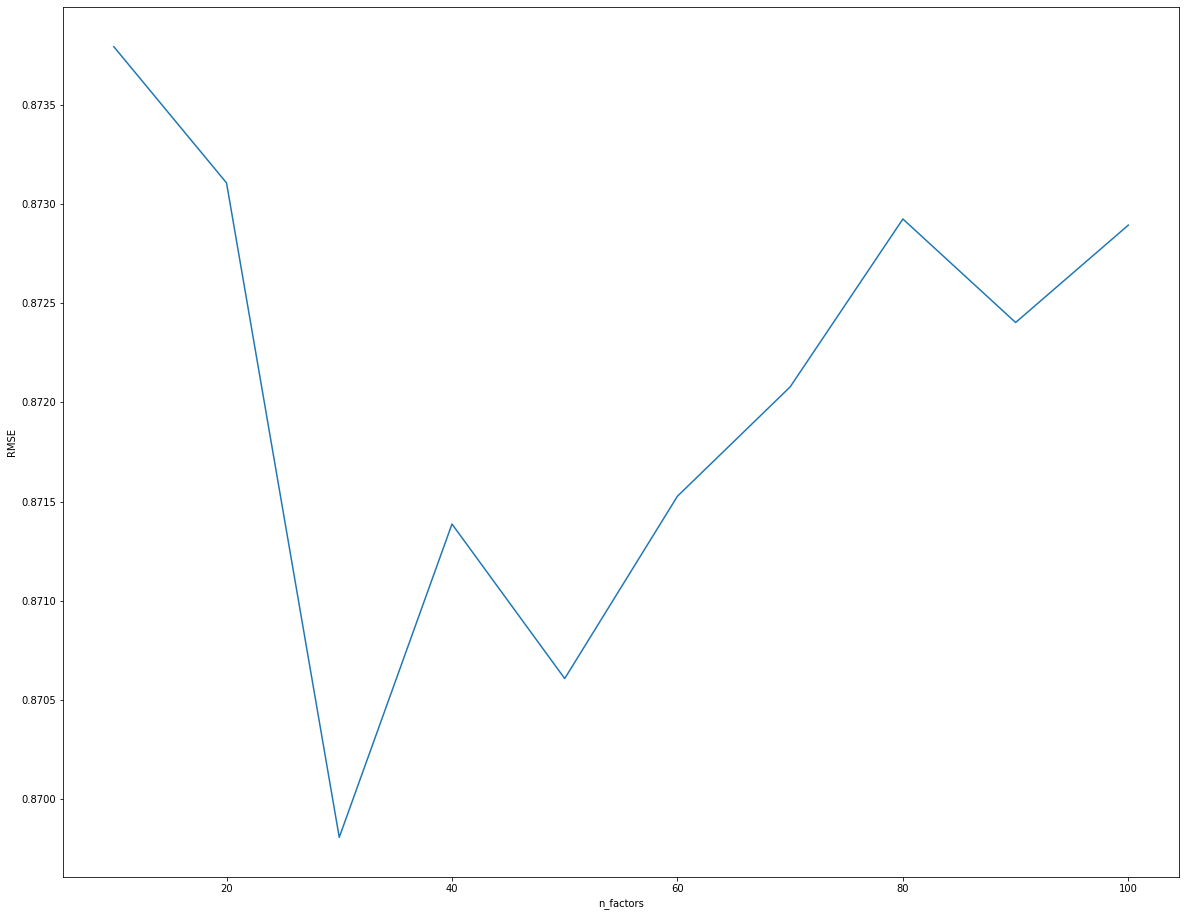

In [ ]:
plt.plot(range(10, 101, 10), rmse_ )
plt.xlabel('n_factors')
plt.ylabel('RMSE')
plt.show()

# 실제 평점과 예측 평점 비교하기

In [ ]:
model = SVD(n_factors=30, random_state=42)
model.fit(train_data)

In [ ]:
test_user_rated_movies = []

for movie_id, rating in test_user_rating_dict.items():
  test_user_rated_movies.append((test_user_id, movie_id, rating))

test_user_rated_movies

[(4, 3468, 5),
 (4, 1210, 3),
 (4, 2951, 4),
 (4, 1214, 4),
 (4, 1036, 4),
 (4, 260, 5),
 (4, 2028, 5),
 (4, 480, 4),
 (4, 1196, 2),
 (4, 1198, 5),
 (4, 1954, 5),
 (4, 1097, 4),
 (4, 3418, 4),
 (4, 3702, 4),
 (4, 2366, 4),
 (4, 1387, 5),
 (4, 3527, 1),
 (4, 1201, 5),
 (4, 2692, 5),
 (4, 2947, 5),
 (4, 1240, 5)]

In [ ]:
test_user_rated_movies_predictions = model.test(test_user_rated_movies)

In [ ]:
movie_ids = []
true_ratings = []
pred_ratings = []

for _, movie_id, true_rating, pred_rating, _ in test_user_rated_movies_predictions:
  title = movie_dict[movie_id]
  movie_ids.append(movie_id)
  true_ratings.append(true_rating)
  pred_ratings.append(pred_rating)
  print(f'{title}: {true_rating:.2f} / {pred_rating:.2f}')

Hustler, The: 5.00 / 4.27
Star Wars: Episode VI - Return of the Jedi: 3.00 / 3.78
Fistful of Dollars, A: 4.00 / 4.18
Alien: 4.00 / 3.96
Die Hard: 4.00 / 4.02
Star Wars: Episode IV - A New Hope: 5.00 / 4.34
Saving Private Ryan: 5.00 / 4.48
Jurassic Park: 4.00 / 3.46
Star Wars: Episode V - The Empire Strikes Back: 2.00 / 4.08
Raiders of the Lost Ark: 5.00 / 4.28
Rocky: 5.00 / 3.86
E.T. the Extra-Terrestrial: 4.00 / 3.87
Thelma & Louise: 4.00 / 3.90
Mad Max: 4.00 / 3.68
King Kong: 4.00 / 3.80
Jaws: 5.00 / 4.20
Predator: 1.00 / 3.45
Good, The Bad and The Ugly, The: 5.00 / 4.30
Run Lola Run (Lola rennt): 5.00 / 4.01
Goldfinger: 5.00 / 3.98
Terminator, The: 5.00 / 3.87


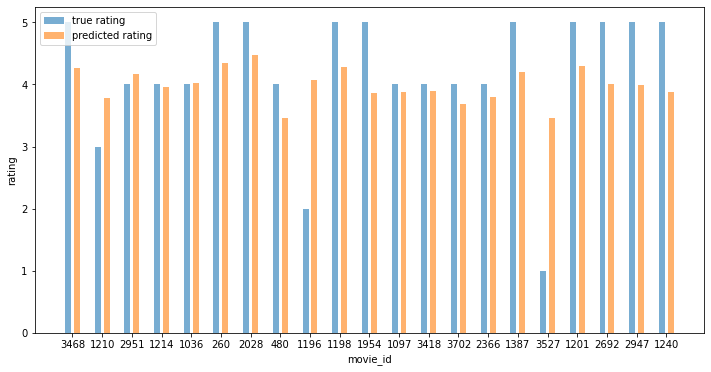

In [ ]:
import numpy as np

index = np.arange(len(movie_ids))

plt.figure(figsize=(12,6))
plt.bar(index - 0.15, true_ratings, width=0.2, alpha=0.6, label='true rating')
plt.bar(index + 0.15, pred_ratings, width=0.2, alpha=0.6, label='predicted rating')
plt.xlabel('movie_id')
plt.ylabel('rating')
plt.xticks(index, movie_ids)
plt.legend()
plt.show()